In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/drive/MyDrive/project_code/PlantVillage",
  shuffle=True,
  image_size=(224,224),
  batch_size=32
  )

Found 2152 files belonging to 3 classes.


In [ ]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

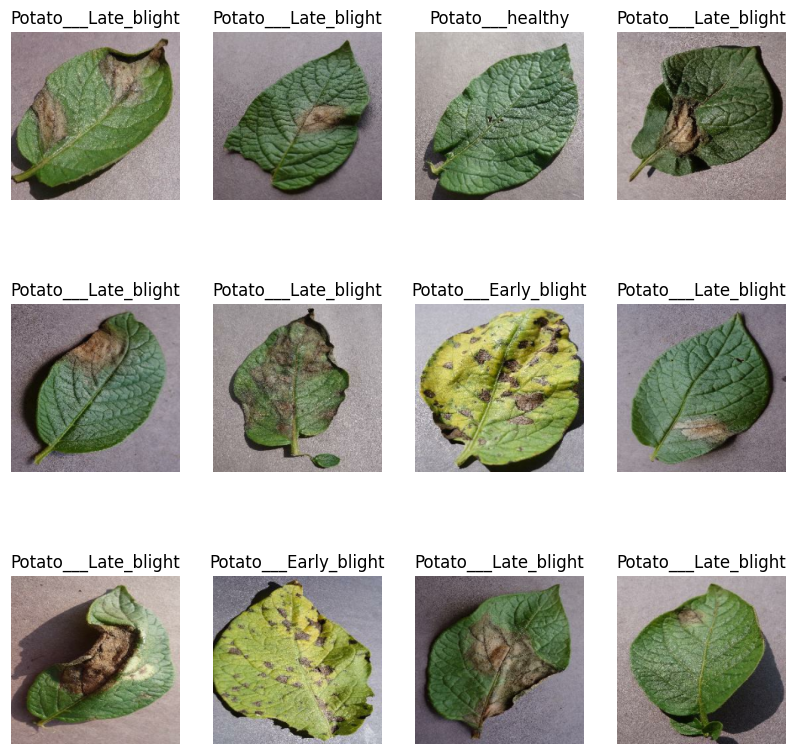

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):


  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")
    # print(image_batch[i].shape)
    # print(label_batch[i].numpy())

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(224, 224),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augumentaion = tf.keras.Sequential([
   layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
   layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
# Apply the preprocessing pipeline (resize and rescale) to the dataset
dataset = dataset.map(lambda x, y: (resize_and_rescale(x), y))

# Apply data augmentation to the dataset
dataset = dataset.map(lambda x, y: (data_augumentaion(x, training=True), y))


In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
   ds_size=len(ds)

   if shuffle:
       ds=ds.shuffle(shuffle_size,seed=12)

   train_size=int(train_split*ds_size)
   val_size=int(val_split*ds_size)

   train_ds=ds.take(train_size)
   val_ds=ds.skip(train_size).take(val_size)
   test_ds=ds.skip(train_size).skip(val_size)

   return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
from keras.api._v2.keras import activations

# Create and compile the models
models_to_test = []

# Model 1: A Deep Convolutional Neural Network (CNN)
model_1 = models.Sequential([
    resize_and_rescale,
    data_augumentaion ,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,224,224,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(len(class_names),activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

models_to_test.append(('Model 1', model_1))

input_shape = (32,224,224, 3)
model_1.build(input_shape)
model_1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 111, 111, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 54, 54, 64)         0         
 2D)                                                  

In [ ]:
# Model 2: A Model with Dropout for Regularization
model_2 = models.Sequential([
    resize_and_rescale,
    data_augumentaion ,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,224,224,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

models_to_test.append(('Model 2', model_2))

input_shape = (32,224,224,3)
model_2.build(input_shape)
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 111, 111, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 54, 54, 64)         0         
 2D)                                                  

In [ ]:
# Model 3: A Pre-trained Model (Transfer Learning)


base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model_3 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])


model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

models_to_test.append(('Model 3', model_3))

input_shape = (224, 224, 3)
model_3.build(input_shape)
model_3.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 128)               163968    
                                                                 
 dense_4 (Dense)             (None, 3)                 387       
                                                                 
Total params: 2,422,339
Trainable params: 164,355
Non-trainable params: 2,257,984
_________________________________________

In [ ]:
# Model 4: ResNet (Residual Network)
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = layers.Flatten()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
output = layers.Dense(len(class_names), activation='softmax')(x)

model_4 = models.Model(inputs=base_model.input, outputs=output)


model_4.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

models_to_test.append(('Model 4', model_4))


input_shape = (224, 224, 3)
model_4.build(input_shape)
model_4.summary()


94765736/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [ ]:
#Model 5: InceptionV3
from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
output = layers.Dense(len(class_names), activation='softmax')(x)

model_5 = models.Model(inputs=base_model.input, outputs=output)

model_5.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

models_to_test.append(('Model 5', model_5))


input_shape = (224, 224, 3)
model_5.build(input_shape)
model_5.summary()


87910968/87910968 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_12[0][0]']              
 alization)                

In [ ]:
# Model training and evaluation
results = []

EPOCHS=10
for model_name, model in models_to_test:
    history = model.fit(
        train_ds,
        epochs=EPOCHS,
        batch_size=32,
        verbose=1,
        validation_data=val_ds
    )
    score = model.evaluate(test_ds)
    results.append((model_name, history, score))

Epoch 1/10
54/54 [==============================] - 421s 5s/step - loss: 0.9464 - accuracy: 0.4711 - val_loss: 0.9104 - val_accuracy: 0.4375
Epoch 2/10
54/54 [==============================] - 224s 4s/step - loss: 0.9030 - accuracy: 0.4624 - val_loss: 0.9118 - val_accuracy: 0.4375
Epoch 3/10
54/54 [==============================] - 236s 4s/step - loss: 0.9044 - accuracy: 0.4664 - val_loss: 0.8972 - val_accuracy: 0.4375
Epoch 4/10
54/54 [==============================] - 219s 4s/step - loss: 0.9048 - accuracy: 0.4641 - val_loss: 0.8961 - val_accuracy: 0.4375
Epoch 5/10
54/54 [==============================] - 221s 4s/step - loss: 0.9060 - accuracy: 0.4774 - val_loss: 0.9014 - val_accuracy: 0.4948
Epoch 6/10
54/54 [==============================] - 225s 4s/step - loss: 0.9026 - accuracy: 0.4578 - val_loss: 0.9005 - val_accuracy: 0.4948
Epoch 7/10
54/54 [==============================] - 230s 4s/step - loss: 0.9017 - accuracy: 0.4670 - val_loss: 0.8975 - val_accuracy: 0.4375
Epoch 8/10
54

In [ ]:
# Print and analyze the results
for model_name, history, score in results:
    print(f"Model: {model_name}")
    print(f"Test Loss: {score[0]}, Test Accuracy: {score[1]}")

    # Plot training history
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
    plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(EPOCHS), history.history['loss'], label='Training Loss')
    plt.plot(range(EPOCHS), history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Loss')

    plt.show()